# Solucion en $\mathtt{python}$

In [1]:
import IPython . display as ipd
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
import time

Conversion de audio

In [2]:
# Convirtiendo el audio ogg a wav
#!ffmpeg -i audio_espanol.ogg -c:a pcm_f32le out.wav

Leyendo mi audio

In [3]:
y_limpio_espanol, fs = librosa.load('out.wav', sr= 8000)

In [4]:
fs

8000

In [5]:
ipd.Audio(y_limpio_espanol, rate=8000)

Creación del audio con ruido

In [6]:
y_init = y_limpio_espanol[0:8000]
y_new = [y_init]
for i in range(1,11):
    y_new.append(y_limpio_espanol[i*8000:(i+1)*8000] + y_init)
    y_init = y_limpio_espanol[i*8000:(i+1)*8000] + y_init

In [7]:
sec_length = len(y_new)
print(sec_length)

11


In [8]:
y = np.reshape(np.array(y_new),(1,11*8000))

In [13]:
y

array([[-1.27516105e-05, -1.76939357e-05,  3.74362571e-07, ...,
         1.19366914e-01,  1.29499286e-03, -7.96526298e-02]], dtype=float32)

In [9]:
ipd.Audio(y, rate=8000)

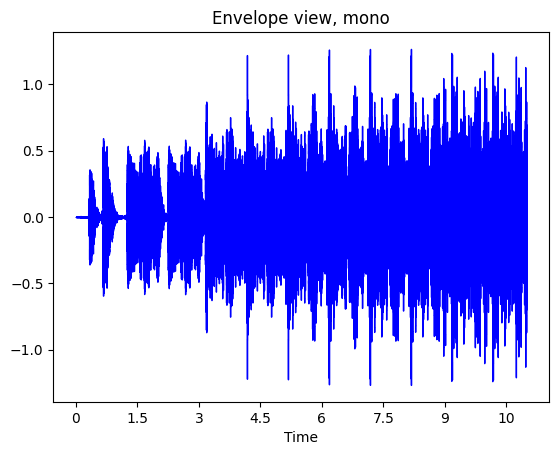

In [19]:
import matplotlib.pyplot as plt
sr = 8000
fig, ax = plt.subplots(nrows=1, sharex=True)
librosa.display.waveshow(y, sr=sr, ax=ax, color="blue")
ax.set(title='Envelope view, mono')
ax.label_outer()

In [20]:
ipd.Audio(y, rate=8000)

In [21]:
y.shape

(1, 88000)

In [22]:
from scipy.io import wavfile
# Specify the desired sample rate (8000 Hz)
sample_rate = 8000
# Save the audio to a WAV file
output_file = "AudioEco.wav"
wavfile.write(output_file, sample_rate, y.T)

Sistema de ecuaciones: abriendo la cuenta para los primeros terminos

\begin{equation}
    \begin{bmatrix} y(8001) \\ y(8002) \\ \vdots \\ y(16000)  \end{bmatrix} = \begin{bmatrix} x(8001) + x(1) \\ x(8002) + x(2) \\ \vdots \\ x(16000) + x(8000) \end{bmatrix}
\end{equation}





\begin{equation}
    \begin{bmatrix} y(8001)- x(1) \\ y(8002)-x(2) \\ \vdots \\ y(16000)-x(8000)  \end{bmatrix} = \begin{bmatrix} x(8001) \\ x(8002) \\ \vdots \\ x(16000) \end{bmatrix}
\end{equation}

\begin{equation}
    \begin{bmatrix} y(16001)- x(8001)- x(1) \\ y(16002)- x(8002)-x(2) \\ \vdots \\ y(24000)- x(1600)-x(8000)  \end{bmatrix} = \begin{bmatrix} x(16001) \\ x(16002) \\ \vdots \\ x(24000) \end{bmatrix}
\end{equation}

De forma general, con $i=1,\dots,N$ con $\mathbf{x}_[0]=\mathbf{x}[0:8000]$: 

\begin{align}
  \mathbf{x}_{\text{temp}} = \mathbf{x}[i*8000:(i+1)*8000] = y[i*8000:(i+1)*8000]- \mathbf{x}_{\text{init}} \\
  x_{init} = x_{init} - \mathbf{x}_{\text{temp}}
\end{align}

Funcion solucion

In [23]:
def function_solution(y: np.array,sec_length: int,fs = 8000)->np.array:

    #Inicializamos variables
    base_batch = y[0,0:fs]

    
    y_final = []
    y_final.append(base_batch)
    
    for i in range(1,sec_length):

        sol = y[0,i*fs:(i+1)*fs] - base_batch
        base_batch = base_batch + sol
        y_final.append(sol)

    output = np.reshape(y_final,(1,(sec_length)*fs))

    return output

In [24]:
output = function_solution(y,sec_length = 11,fs = 8000)

In [25]:
ipd.Audio(output, rate=8000, autoplay=True)